In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

pd.set_option('display.max_columns', 500)

In [53]:
### reading csv file 
dataset=pd.read_csv('Algerian_forest_fires_dataset_UPDATE.csv',header=1 )

dataset.iloc[121:].head(4) # index 122, 123 need to be removed from dataset

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
121,30,09,2012,25,78,14,1.4,45,1.9,7.5,0.2,2.4,0.1,not fire
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
123,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
124,01,06,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire


## 1.1 Dropping rows which have no information

In [55]:

dataset.drop(index=[122,123], inplace=True) # droping row 122,123 from dataset
dataset.reset_index(inplace=True)
dataset.drop('index', axis=1, inplace=True)

dataset.iloc[121:].head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
121,30,09,2012,25,78,14,1.4,45,1.9,7.5,0.2,2.4,0.1,not fire
122,01,06,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire
123,02,06,2012,30,73,13,4,55.7,2.7,7.8,0.6,2.9,0.2,not fire
124,03,06,2012,29,80,14,2,48.7,2.2,7.6,0.3,2.6,0.1,not fire
125,04,06,2012,30,64,14,0,79.4,5.2,15.4,2.2,5.6,1,not fire


In [56]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          244 non-null    object
 1   month        244 non-null    object
 2   year         244 non-null    object
 3   Temperature  244 non-null    object
 4    RH          244 non-null    object
 5    Ws          244 non-null    object
 6   Rain         244 non-null    object
 7   FFMC         244 non-null    object
 8   DMC          244 non-null    object
 9   DC           244 non-null    object
 10  ISI          244 non-null    object
 11  BUI          244 non-null    object
 12  FWI          244 non-null    object
 13  Classes      243 non-null    object
dtypes: object(14)
memory usage: 26.8+ KB


In [149]:

dataset.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes'],
      dtype='object')

In [150]:
# removing spaces from column names
dataset.columns= [col_name.strip() for col_name in dataset.columns]
dataset.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes'],
      dtype='object')

In [151]:
### converting all feature values to string so that we can clean data.
dataset=dataset.astype(str)

In [152]:
### somes values in columns also have space
for feature in ['Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes']:
    dataset[feature]= dataset[feature].str.replace(" ","")

In [153]:
### index no 165 for feature name FWI has value fire
dataset[dataset['FWI']== 'fire'].index

Int64Index([], dtype='int64')

In [154]:
### replacing fire value witha float value
dataset.loc[165,'FWI']=' 0.1'

In [155]:
### replacing nan value wit fire to make data equal to the info given in dataset 
dataset[dataset['Classes']== 'nan'].index
dataset.loc[165,'Classes']='fire'

In [156]:
### changing datatypes of features to numerical for numerical features as all are in object

In [157]:
datatype_convert={'day':'int64','month':'int64','year':'int64','Temperature':'int64','RH':'int64', 'Ws':'int64','Rain':'float64',
                  'FFMC':'float64', 'DMC':'float64', 'DC':'float64', 'ISI':'float64', 'BUI':'float64', 'FWI':'float64', 
                  }

dataset=dataset.astype(datatype_convert)
dataset.dtypes

day              int64
month            int64
year             int64
Temperature      int64
RH               int64
Ws               int64
Rain           float64
FFMC           float64
DMC            float64
DC             float64
ISI            float64
BUI            float64
FWI            float64
Classes         object
dtype: object

In [158]:
dataset.describe()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
count,244.000000,244.000000,244.0,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000
mean,15.754098,7.500000,2012.0,32.172131,61.938525,15.504098,0.760656,77.887705,14.673361,49.288484,4.774180,16.664754,7.006967
std,8.825059,1.112961,0.0,3.633843,14.884200,2.810178,1.999406,14.337571,12.368039,47.619393,4.175318,14.204824,7.438505
min,1.000000,6.000000,2012.0,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000
25%,8.000000,7.000000,2012.0,30.000000,52.000000,14.000000,0.000000,72.075000,5.800000,13.275000,1.400000,6.000000,0.700000
50%,16.000000,7.500000,2012.0,32.000000,63.000000,15.000000,0.000000,83.500000,11.300000,33.100000,3.500000,12.250000,4.200000
75%,23.000000,8.000000,2012.0,35.000000,73.250000,17.000000,0.500000,88.300000,20.750000,68.150000,7.300000,22.525000,11.375000
max,31.000000,9.000000,2012.0,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.000000,31.100000


## Checking for null values

In [69]:
dataset.isnull().sum()

day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
dtype: int64

In [70]:
dataset.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,notfire
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,notfire
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,notfire
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,notfire
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,notfire


In [71]:
dataset.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes'],
      dtype='object')

In [72]:
df = dataset.drop(['Classes'],axis = 'columns') # dropping classes as it is not requred

In [73]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5


In [74]:
df.describe()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
count,244.000000,244.000000,244.0,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000
mean,15.754098,7.500000,2012.0,32.172131,61.938525,15.504098,0.760656,77.887705,14.673361,49.288484,4.774180,16.664754,7.006967
std,8.825059,1.112961,0.0,3.633843,14.884200,2.810178,1.999406,14.337571,12.368039,47.619393,4.175318,14.204824,7.438505
min,1.000000,6.000000,2012.0,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000
25%,8.000000,7.000000,2012.0,30.000000,52.000000,14.000000,0.000000,72.075000,5.800000,13.275000,1.400000,6.000000,0.700000
50%,16.000000,7.500000,2012.0,32.000000,63.000000,15.000000,0.000000,83.500000,11.300000,33.100000,3.500000,12.250000,4.200000
75%,23.000000,8.000000,2012.0,35.000000,73.250000,17.000000,0.500000,88.300000,20.750000,68.150000,7.300000,22.525000,11.375000
max,31.000000,9.000000,2012.0,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.000000,31.100000


In [78]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI'],
      dtype='object')

## Rearranging columns

In [81]:
new_cols = ['day', 'month', 'year', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI','Temperature']
df= df[new_cols]

In [82]:
df.head()

,day,month,year,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Temperature
0,1,6,2012,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,29
1,2,6,2012,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,29
2,3,6,2012,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,26
3,4,6,2012,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,25
4,5,6,2012,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,27


In [83]:
df.corr() ## Checking correlation between data

,day,month,year,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Temperature
day,1.000000e+00,2.232788e-17,NaN,-0.074209,0.047001,-0.112265,0.224032,0.491571,0.527930,0.177727,0.517229,0.350890,0.095772
month,2.232788e-17,1.000000e+00,NaN,-0.037884,-0.041447,0.035322,0.015577,0.068178,0.127669,0.061680,0.085822,0.084181,-0.059017
year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
RH,-7.420934e-02,-3.788419e-02,NaN,1.000000,0.236084,0.222968,-0.645658,-0.405133,-0.220344,-0.690637,-0.348587,-0.570119,-0.654443
Ws,4.700086e-02,-4.144673e-02,NaN,0.236084,1.000000,0.170169,-0.163255,-0.001246,0.076253,0.015248,0.029756,0.028850,-0.278132
Rain,-1.122654e-01,3.532207e-02,NaN,0.222968,0.170169,1.000000,-0.544045,-0.288548,-0.296808,-0.347105,-0.299171,-0.322715,-0.326786
FFMC,2.240321e-01,1.557668e-02,NaN,-0.645658,-0.163255,-0.544045,1.000000,0.602391,0.503919,0.739730,0.589652,0.686111,0.677491
DMC,4.915710e-01,6.817778e-02,NaN,-0.405133,-0.001246,-0.288548,0.602391,1.000000,0.875362,0.674499,0.982073,0.874816,0.483105
DC,5.279300e-01,1.276691e-01,NaN,-0.220344,0.076253,-0.296808,0.503919,0.875362,1.000000,0.498926,0.941906,0.740184,0.370511
ISI,1.777266e-01,6.168011e-02,NaN,-0.690637,0.015248,-0.347105,0.739730,0.674499,0.498926,1.000000,0.635891,0.907610,0.607551


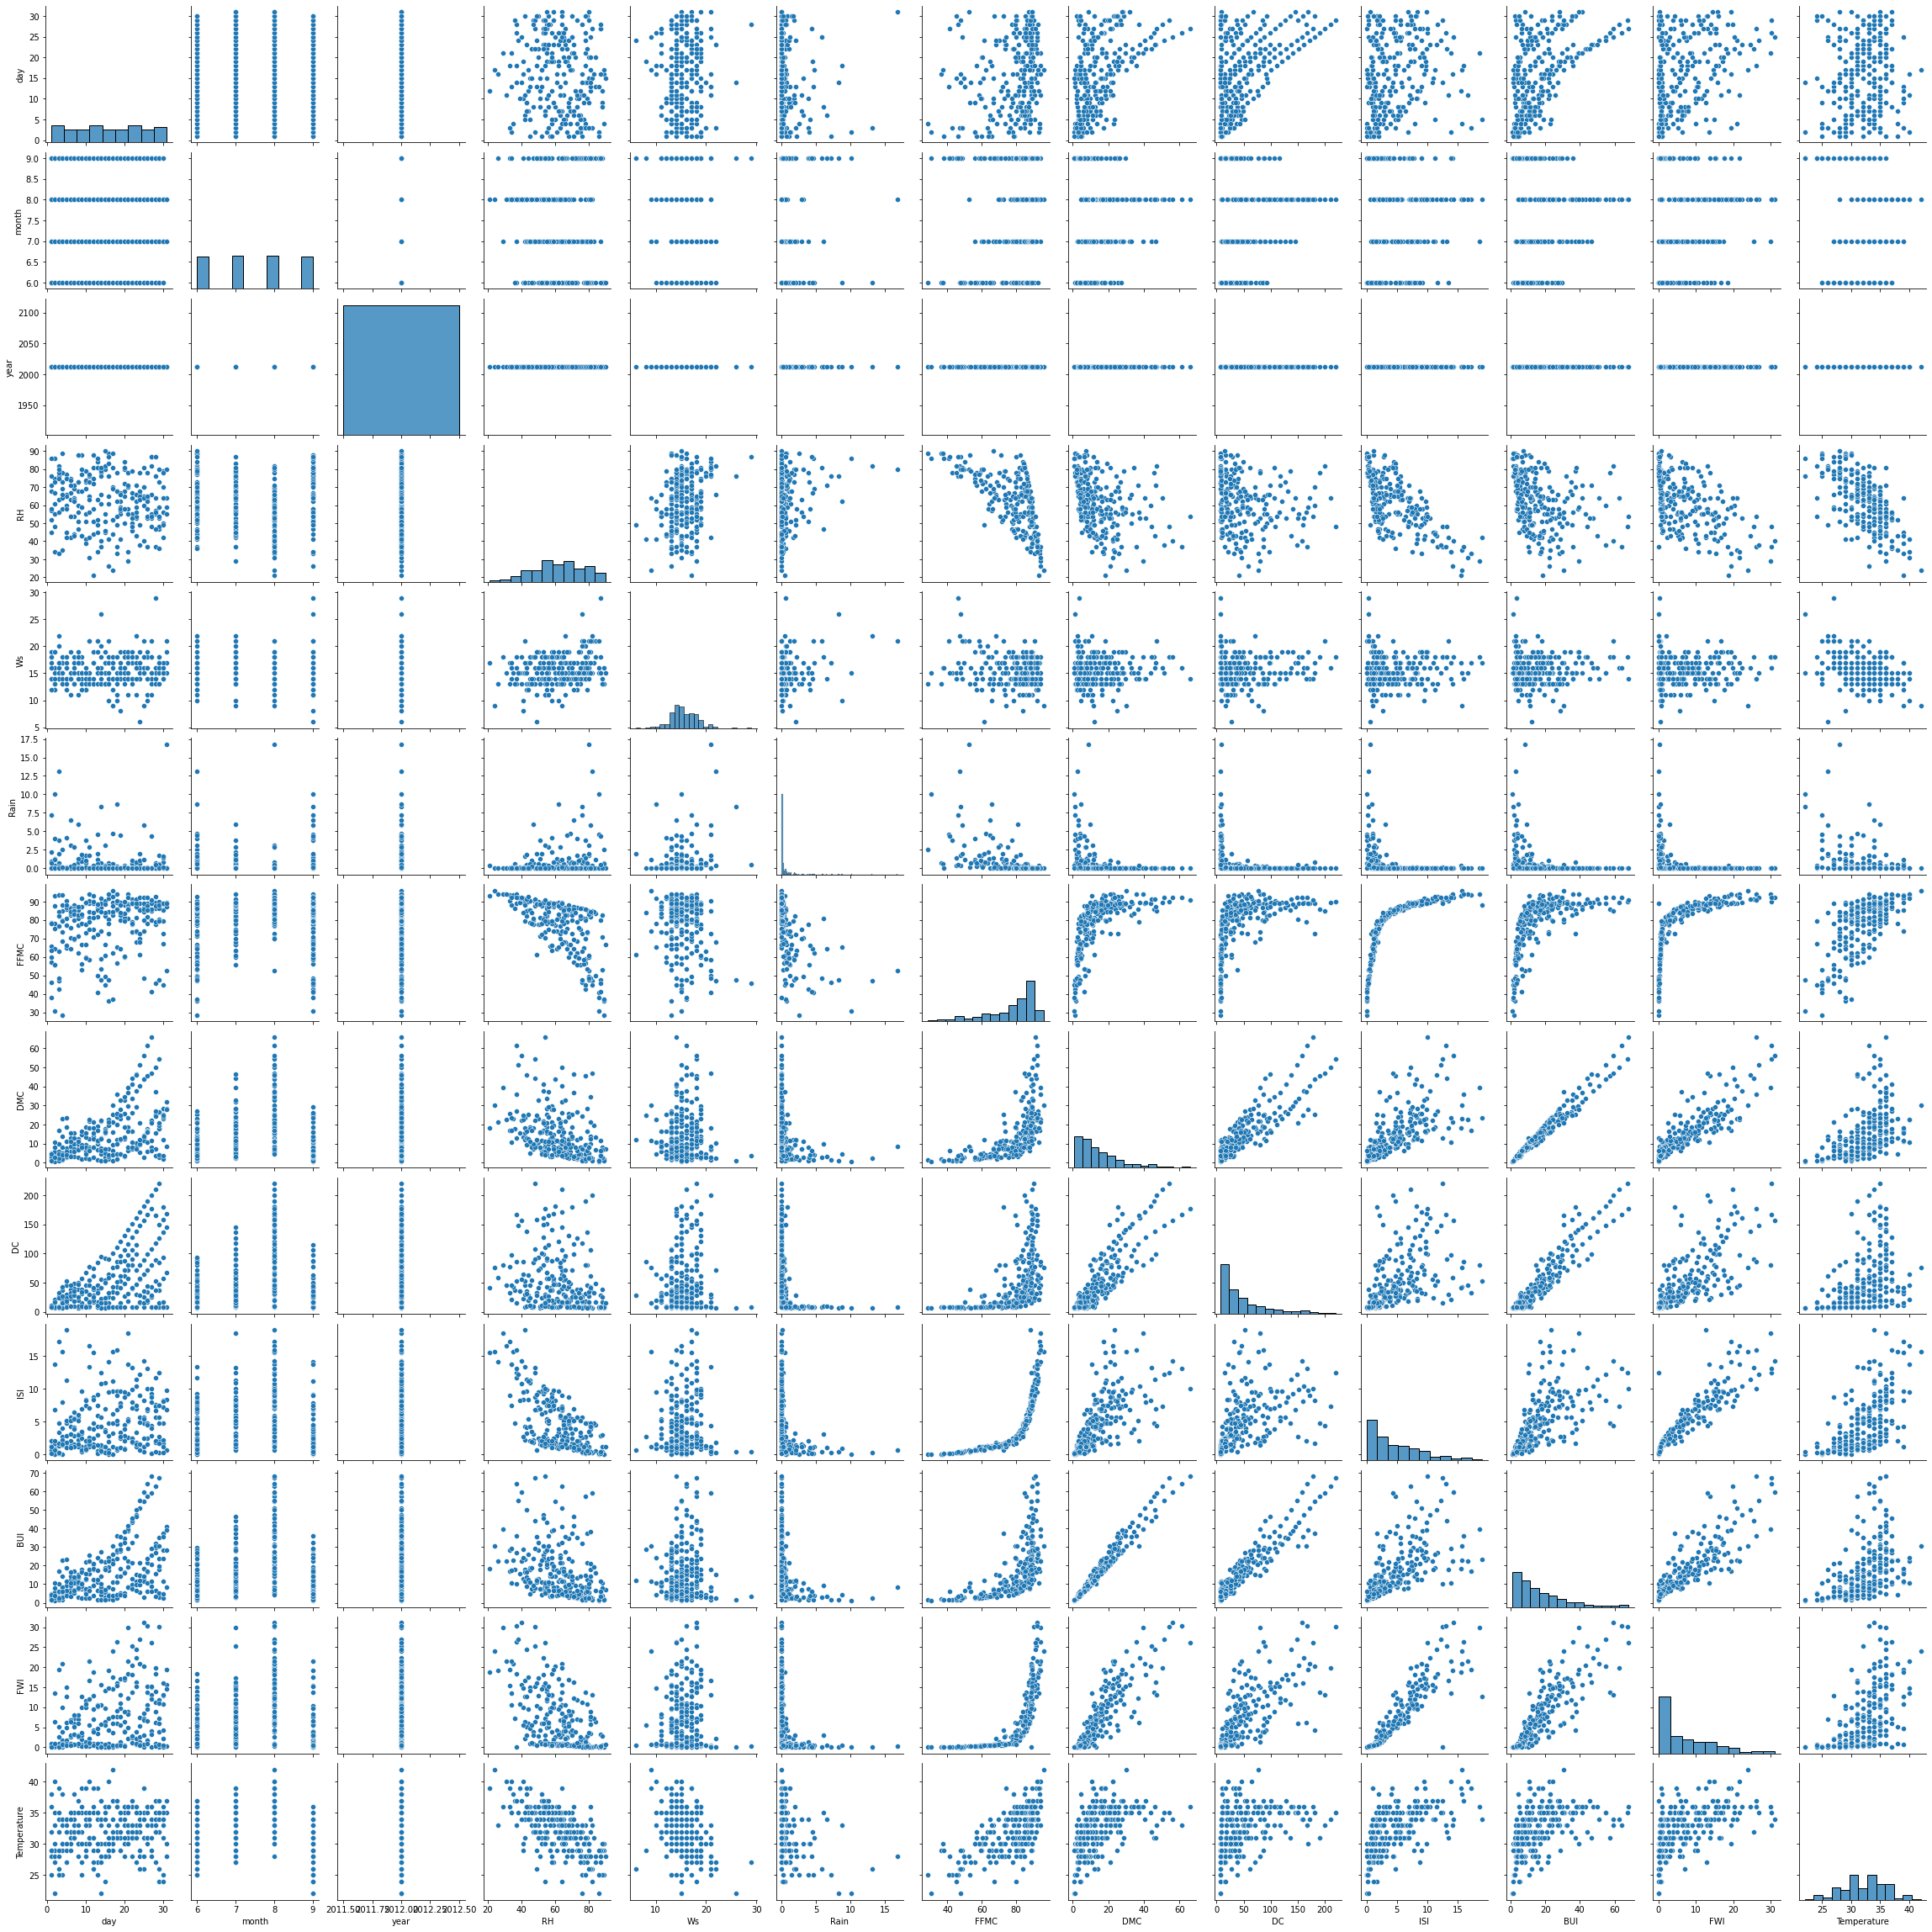

In [84]:
import seaborn as sns
sns.pairplot(df)

<AxesSubplot:>

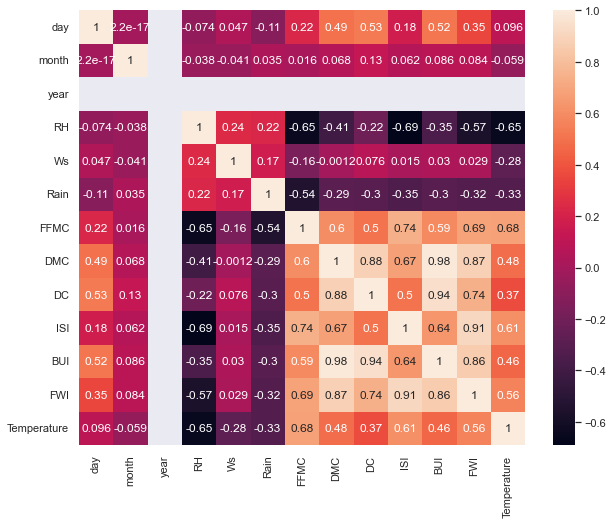

In [85]:
sns.set(rc={'figure.figsize':(10,8)})

sns.heatmap(df.corr(),annot=True)

In [ ]:
#Observations
#Very highly Correlated features: DMC-BUI, DC-BUI, ISI-FWI
#Highly correlated features: FFMC-ISI, DC-DMC, FWI-DMC, FWI-DC, FWI-BUI
# Temperature is positively collerated with FFMC,FWI and ISI. Temperature is negatively collerated with RH.


## Analysing relation with plots

Text(0, 0.5, 'Temperature')

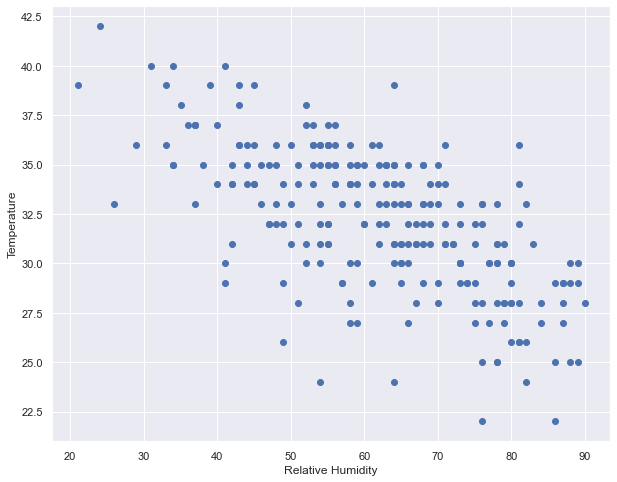

In [86]:
plt.scatter(df['RH'],df['Temperature'])
plt.xlabel("Relative Humidity")
plt.ylabel("Temperature")

<AxesSubplot:xlabel='RH', ylabel='Temperature'>

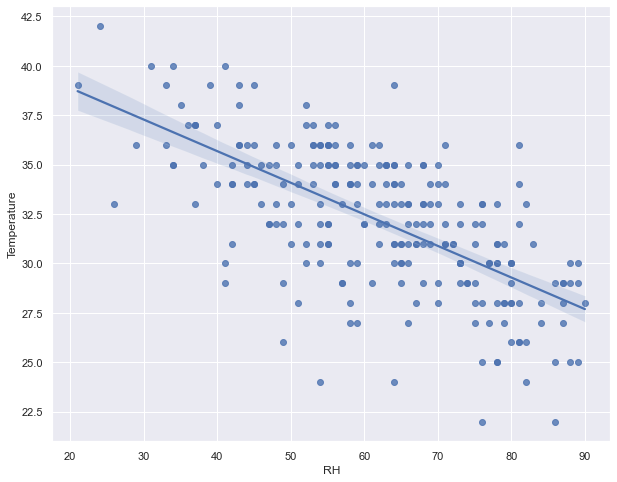

In [89]:
sns.regplot(x="RH",y="Temperature",data=dataset)

Text(0, 0.5, 'Temperature')

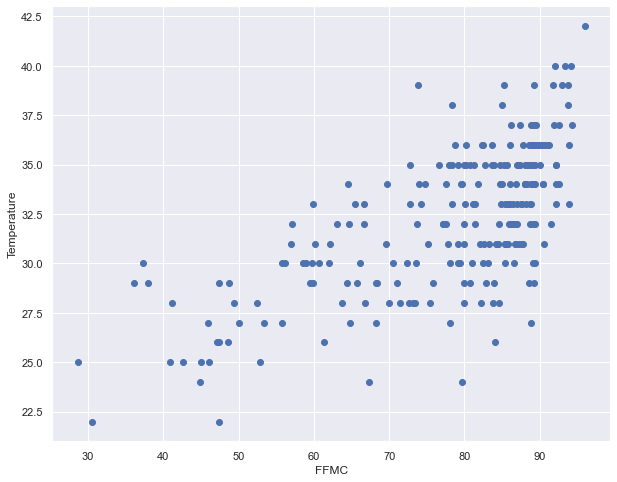

In [87]:
plt.scatter(df['FFMC'],df['Temperature'])
plt.xlabel("FFMC")
plt.ylabel("Temperature")

<AxesSubplot:xlabel='FFMC', ylabel='Temperature'>

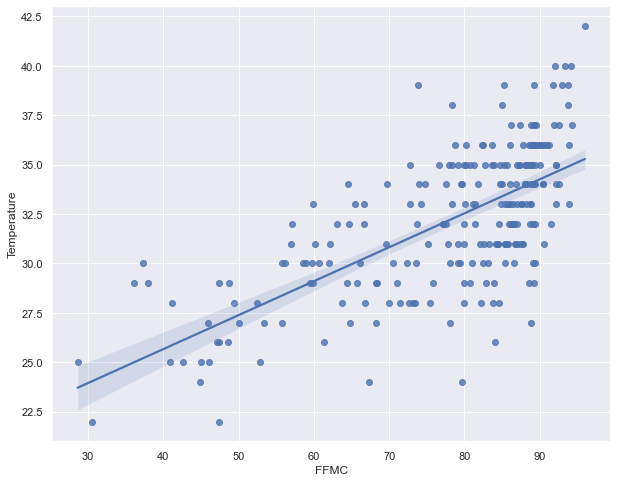

In [88]:
sns.regplot(x="FFMC",y="Temperature",data=df)

## Independent And Dependent Features

In [90]:

X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [91]:
X.head(2)

,day,month,year,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
0,1,6,2012,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5
1,2,6,2012,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4


In [93]:
y.head(2)

0    29
1    29
Name: Temperature, dtype: int64

In [95]:
from sklearn.model_selection import train_test_split

In [101]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=10)

In [102]:
X_train.shape

(170, 12)

In [103]:
y_train.shape

(170,)

In [104]:
X_test.shape

(74, 12)

In [105]:
y_test.shape

(74,)

In [106]:
## Standardize or feature scaling the datasets
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [107]:
scaler

StandardScaler()

In [108]:
X_train=scaler.fit_transform(X_train)

In [109]:
X_test=scaler.transform(X_test)

In [110]:
X_train

array([[-0.6373472 , -0.45776161,  0.        , ..., -0.84667549,
        -0.74826664, -0.83816624],
       [ 1.40697401,  0.4367151 ,  0.        , ..., -0.06622043,
         2.82942503,  0.81428642],
       [ 0.32468631, -0.45776161,  0.        , ...,  0.1229808 ,
         0.46212998,  0.28081745],
       ...,
       [-0.03607626,  1.33119181,  0.        , ...,  0.5250334 ,
         0.05420626,  0.37189752],
       [-1.35887233, -1.35223833,  0.        , ..., -0.5865238 ,
        -0.76164119, -0.77310905],
       [-0.6373472 , -1.35223833,  0.        , ..., -0.79937518,
        -0.293532  , -0.78612049]])

## Model training

In [112]:
from sklearn.linear_model import LinearRegression

In [113]:
regression=LinearRegression()

In [114]:
regression.fit(X_train,y_train)

LinearRegression()

In [115]:
## print the coefficients and the intercept
print(regression.coef_)

[-0.12676949 -0.39711272  0.         -1.02953029 -0.63521119 -0.21194282
  1.12843172  0.37486714  1.05185933  0.63544226 -0.88418893 -0.33637348]


In [116]:
print(regression.intercept_)

32.12352941176471


In [117]:
## PRediction for the test data
reg_pred=regression.predict(X_test)

In [118]:
reg_pred

array([31.66427664, 33.42976464, 33.25332567, 31.72140369, 33.03271689,
       34.72033249, 34.06665029, 33.44065178, 32.29644174, 33.50718405,
       33.567575  , 27.13881389, 34.82825568, 28.95732708, 31.77370053,
       32.35646269, 34.53767523, 27.17508015, 36.14790409, 34.25191236,
       33.48856814, 33.88847386, 34.12866771, 33.21922338, 36.10182235,
       29.45892044, 32.25026262, 32.03833683, 26.76184685, 32.54572003,
       25.23983487, 26.30999854, 34.80075213, 31.90047851, 33.53089025,
       30.15325543, 29.48903634, 32.03634776, 27.06966665, 35.62251978,
       32.76166871, 33.90553959, 34.44921776, 30.98916524, 36.22008727,
       34.14631448, 24.29622435, 35.12305735, 34.09307628, 29.45014331,
       31.89611208, 32.80902991, 35.17730381, 32.92704992, 30.02018332,
       29.92503065, 32.33916864, 36.27936819, 31.08220394, 32.99412857,
       32.53415508, 33.04326708, 31.63659   , 25.23977923, 31.45144003,
       36.38890172, 29.75882849, 29.97636748, 34.48895873, 33.89

## Assumptions of LR

Text(0, 0.5, 'Test Predicted Data')

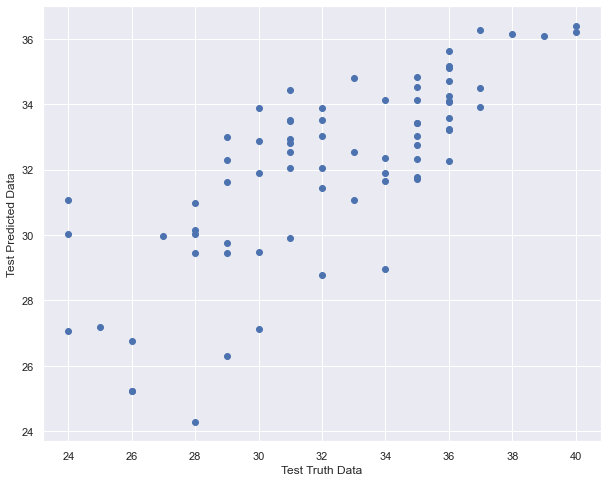

In [119]:
plt.scatter(y_test,reg_pred)
plt.xlabel("Test Truth Data")
plt.ylabel("Test Predicted Data")

In [120]:
## residuals
residuals=y_test-reg_pred

In [121]:
residuals

162    2.335723
60     1.570235
61     2.746674
63     3.278596
69     1.967283
         ...   
142   -1.892934
32     3.217780
242   -7.074001
7     -2.891923
243   -6.027586
Name: Temperature, Length: 74, dtype: float64

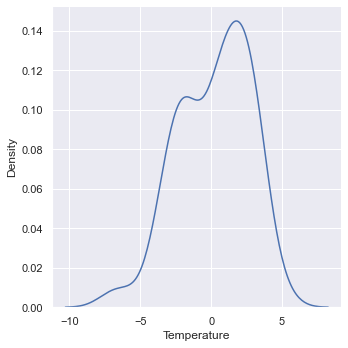

In [122]:
sns.displot(residuals,kind="kde")

Text(0, 0.5, 'residuals')

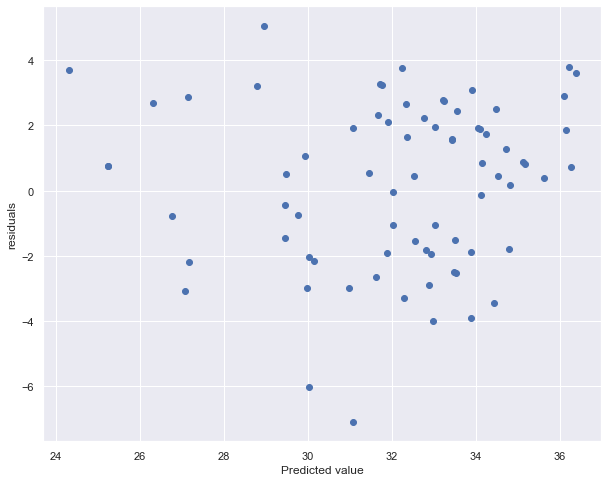

In [128]:
## SCatter plot with predictions and residual
##uniform distribution
plt.scatter(reg_pred,residuals)
plt.xlabel("Predicted value")
plt.ylabel("residuals")

In [129]:
## Performance Metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print(mean_squared_error(y_test,reg_pred))
print(mean_absolute_error(y_test,reg_pred))
print(np.sqrt(mean_squared_error(y_test,reg_pred)))

6.327519955651416
2.141354806099302
2.5154562122309776


## R square and adjusted R square

In [131]:
from sklearn.metrics import r2_score
score=r2_score(y_test,reg_pred)
print(score)

0.5770376426417261


In [132]:
## Adjusted R square
#display adjusted R-squared
1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.4938319329974754

In [133]:
## Ridge
from sklearn.linear_model import Ridge
ridge=Ridge()

In [134]:
ridge.fit(X_train,y_train)

Ridge()

In [137]:
ridge_pred = ridge.predict(X_test)
ridge_pred

array([31.6649845 , 33.44940604, 33.25571716, 31.72647724, 33.03167511,
       34.75462383, 34.03289428, 33.36420378, 32.28654092, 33.48468443,
       33.54879158, 27.16683672, 34.81891951, 28.93942898, 31.77235813,
       32.34331708, 34.51060046, 27.22920612, 36.15498416, 34.26276819,
       33.46792178, 33.84846259, 34.12484006, 33.20479171, 36.07872066,
       29.45593413, 32.18823784, 32.07855989, 26.80644475, 32.5493523 ,
       25.25732638, 26.35963573, 34.76324826, 31.9025974 , 33.51542102,
       30.16262373, 29.47039131, 32.03605846, 27.11594557, 35.61369496,
       32.76367843, 33.89142932, 34.45155807, 30.97798111, 36.20411912,
       34.14600291, 24.26579574, 35.13018276, 34.08706044, 29.45287025,
       31.8701109 , 32.7977545 , 35.20254419, 32.90049738, 30.03157389,
       29.91085704, 32.35685676, 36.2948091 , 31.08100034, 32.98697168,
       32.52799155, 33.04555204, 31.62895   , 25.18106937, 31.46639403,
       36.34697019, 29.7464771 , 29.96052629, 34.51518361, 33.86

Text(0, 0.5, 'Test Predicted Data')

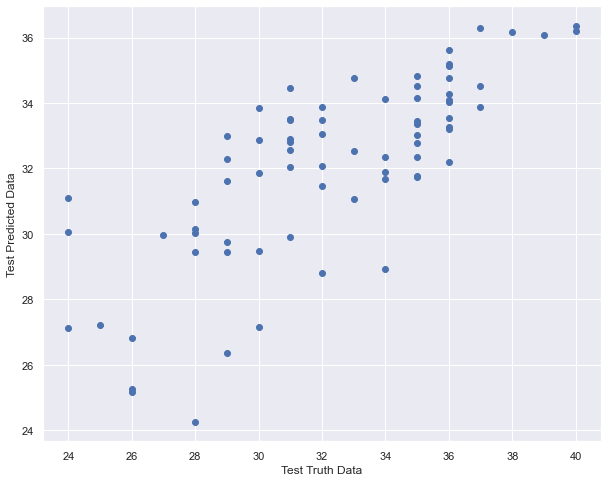

In [138]:
plt.scatter(y_test,ridge_pred)
plt.xlabel("Test Truth Data")
plt.ylabel("Test Predicted Data")

In [139]:
## Performance Metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print(mean_squared_error(y_test,ridge_pred))
print(mean_absolute_error(y_test,ridge_pred))
print(np.sqrt(mean_squared_error(y_test,ridge_pred)))

6.343157677702364
2.1435795967652234
2.518562621358136


In [140]:
from sklearn.metrics import r2_score
score=r2_score(y_test,reg_pred)
print(score)

0.5770376426417261


In [141]:
## Adjusted R square
#display adjusted R-squared
1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.4938319329974754

In [142]:
## Ridge
from sklearn.linear_model import Lasso
lasso=Lasso()

In [143]:
lasso.fit(X_train,y_train)

Lasso()

In [144]:
lasso_pred = ridge.predict(X_test)
lasso_pred

array([31.6649845 , 33.44940604, 33.25571716, 31.72647724, 33.03167511,
       34.75462383, 34.03289428, 33.36420378, 32.28654092, 33.48468443,
       33.54879158, 27.16683672, 34.81891951, 28.93942898, 31.77235813,
       32.34331708, 34.51060046, 27.22920612, 36.15498416, 34.26276819,
       33.46792178, 33.84846259, 34.12484006, 33.20479171, 36.07872066,
       29.45593413, 32.18823784, 32.07855989, 26.80644475, 32.5493523 ,
       25.25732638, 26.35963573, 34.76324826, 31.9025974 , 33.51542102,
       30.16262373, 29.47039131, 32.03605846, 27.11594557, 35.61369496,
       32.76367843, 33.89142932, 34.45155807, 30.97798111, 36.20411912,
       34.14600291, 24.26579574, 35.13018276, 34.08706044, 29.45287025,
       31.8701109 , 32.7977545 , 35.20254419, 32.90049738, 30.03157389,
       29.91085704, 32.35685676, 36.2948091 , 31.08100034, 32.98697168,
       32.52799155, 33.04555204, 31.62895   , 25.18106937, 31.46639403,
       36.34697019, 29.7464771 , 29.96052629, 34.51518361, 33.86

Text(0, 0.5, 'Test Predicted Data')

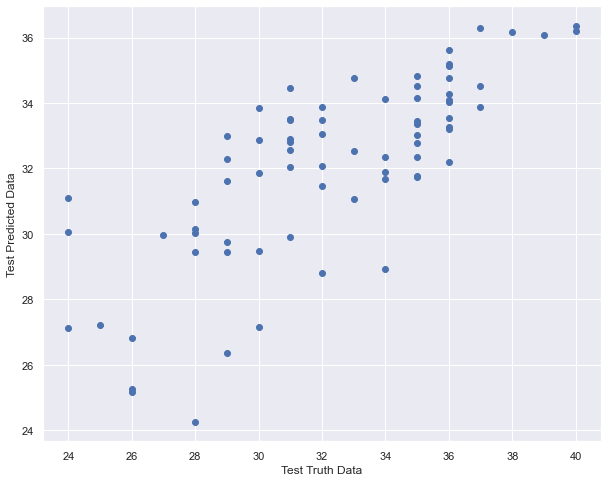

In [145]:
plt.scatter(y_test,lasso_pred)
plt.xlabel("Test Truth Data")
plt.ylabel("Test Predicted Data")

In [146]:
## Performance Metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print(mean_squared_error(y_test,lasso_pred))
print(mean_absolute_error(y_test,lasso_pred))
print(np.sqrt(mean_squared_error(y_test,lasso_pred)))

6.343157677702364
2.1435795967652234
2.518562621358136


In [147]:
from sklearn.metrics import r2_score
score=r2_score(y_test,reg_pred)
print(score)

0.5770376426417261


In [148]:
## Adjusted R square
#display adjusted R-squared
1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.4938319329974754